<a href="https://colab.research.google.com/github/dwi11harsh/Link-Tree-Graphviz/blob/main/link_tree_visualization_with_graphviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import requests
from bs4 import BeautifulSoup
from graphviz import Digraph
from IPython.display import Image

In [38]:
# input url in place of following example url
original_url = "https://www.youtube.com/watch?v=dQw4w9WgXcQ"

In [39]:
# fetching web page content
response = requests.get(original_url)
response

<Response [200]>

In [40]:
# extracting html content
html_content=response.text
html_content

'<!DOCTYPE html><html style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" lang="en" darker-dark-theme darker-dark-theme-deprecate system-icons typography typography-spacing refresh><head><script data-id="_gd" nonce="eDwW5-4FGIHUFOWAWtTe6g">window.WIZ_global_data = {"MUE6Ne":"youtube_web","MuJWjd":false,"UUFaWc":"%.@.null,1000,2]","cfb2h":"youtube.web-front-end-critical_20250226.10_p0","fPDxwd":[],"iCzhFc":false,"nQyAE":{},"oxN3nb":{"1":false,"0":false,"610401301":false,"899588437":false,"725719775":false,"651175828":false,"722764542":false},"u4g7r":"%.@.null,1,2]","xnI9P":false,"xwAfE":true,"yFnxrf":2486};</script><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta http-equiv="origin-trial" content="ApvK67ociHgr2egd6c2ZjrfPuRs8BHcvSggogIOPQNH7GJ3cVlyJ1NOq/COCdj0+zxskqHt9HgLLETc8qqD+vwsAAABteyJvcmlnaW4iOiJodHRwczovL3lvdXR1YmUuY29tOjQ0MyIsImZlYXR1cmUiOiJQcml2YWN5U2FuZGJveEFkc0FQSXMiLCJleHBpcnkiOjE2OTUxNjc5OTksImlzU3ViZG9tYWluIjp0cnVlfQ=="/><script nonce="eDwW5-4FGIHUF

In [41]:
# parsing html content to extract links
soup = BeautifulSoup(html_content, 'html.parser')
soup

<!DOCTYPE html>
<html darker-dark-theme="" darker-dark-theme-deprecate="" lang="en" refresh="" style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" system-icons="" typography="" typography-spacing=""><head><script data-id="_gd" nonce="eDwW5-4FGIHUFOWAWtTe6g">window.WIZ_global_data = {"MUE6Ne":"youtube_web","MuJWjd":false,"UUFaWc":"%.@.null,1000,2]","cfb2h":"youtube.web-front-end-critical_20250226.10_p0","fPDxwd":[],"iCzhFc":false,"nQyAE":{},"oxN3nb":{"1":false,"0":false,"610401301":false,"899588437":false,"725719775":false,"651175828":false,"722764542":false},"u4g7r":"%.@.null,1,2]","xnI9P":false,"xwAfE":true,"yFnxrf":2486};</script><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="ApvK67ociHgr2egd6c2ZjrfPuRs8BHcvSggogIOPQNH7GJ3cVlyJ1NOq/COCdj0+zxskqHt9HgLLETc8qqD+vwsAAABteyJvcmlnaW4iOiJodHRwczovL3lvdXR1YmUuY29tOjQ0MyIsImZlYXR1cmUiOiJQcml2YWN5U2FuZGJveEFkc0FQSXMiLCJleHBpcnkiOjE2OTUxNjc5OTksImlzU3ViZG9tYWluIjp0cnVlfQ==" http-equiv="origin-trial"/><script no

In [42]:
links = set()
for a_tag in soup.find_all('a', href=True):
  href = a_tag['href']
  if href.startswith('http://') or href.startswith('https://'):
    links.add(href)

links

{'https://developers.google.com/youtube',
 'https://tv.youtube.com/learn/nflsundayticket',
 'https://www.youtube.com/about/',
 'https://www.youtube.com/about/copyright/',
 'https://www.youtube.com/about/policies/',
 'https://www.youtube.com/about/press/',
 'https://www.youtube.com/ads/',
 'https://www.youtube.com/creators/',
 'https://www.youtube.com/howyoutubeworks?utm_campaign=ytgen&utm_source=ythp&utm_medium=LeftNav&utm_content=txt&u=https%3A%2F%2Fwww.youtube.com%2Fhowyoutubeworks%3Futm_source%3Dythp%26utm_medium%3DLeftNav%26utm_campaign%3Dytgen'}

In [49]:
# creating a directed graph using Digraph api from graphviz
graph = Digraph()
graph.attr(layout='neato', overlap='false', splines='true')
# visit `graphviz.org/docs/layouts/` for more layout options and `graphviz.org/docs/attrs/splines/` for more spline options

# adding edges to the graph
for url in links:
  graph.edge(f'"{original_url}"', f'"{url}"')

In [50]:
# render and save
graph.render('outfile.gv', format='png', cleanup=True)

'outfile.gv.png'

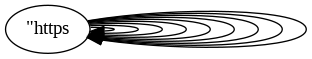

In [51]:
Image(filename='outfile.gv.png')